# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load Engineered Dataset

In [2]:
df = pd.read_csv("../data/urban_traffic_engineered.csv")
df.head()

,road_id,hour,day_of_week,is_weekend,road_type,lane_count,weather,visibility_km,accident_reported,traffic_volume,avg_speed,travel_time_min,congestion_level,is_peak_hour,hour_sin,hour_cos
0,103,11,0,0,Highway,5,Rain,4.700783,0,130,43.962934,17.303469,Low,0,0.258819,-9.659258e-01
1,52,1,0,0,Local,1,Clear,6.237843,0,393,69.132264,17.131562,Low,0,0.258819,9.659258e-01
2,93,17,5,1,Highway,5,Clear,6.251072,0,1225,42.718578,40.431364,High,1,-0.965926,-2.588190e-01
3,15,6,6,1,Highway,5,Rain,2.344686,0,301,33.536640,22.129002,Low,0,1.000000,6.123234e-17
4,107,16,4,0,Highway,4,Clear,6.657439,0,273,31.774258,19.769051,Low,0,-0.866025,-5.000000e-01


# Select Features for Clustering

In [3]:
cluster_features = df[
    ["hour", "traffic_volume", "avg_speed", "is_peak_hour"]
]

# Feature Scaling

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

# Elbow Method (Choosing K)

In [5]:
inertia = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

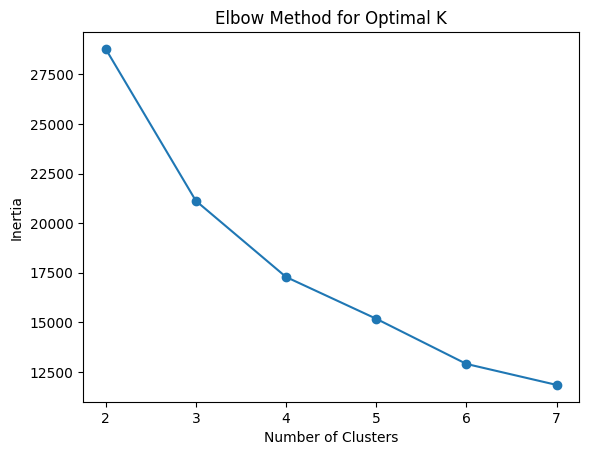

In [6]:
plt.plot(range(2, 8), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Train KMeans Model

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["traffic_cluster"] = kmeans.fit_predict(X_scaled)

# Cluster Distribution

In [8]:
df["traffic_cluster"].value_counts()

traffic_cluster
2    5558
1    3399
0    3043
Name: count, dtype: int64

# Cluster Interpretation

In [9]:
cluster_summary = df.groupby("traffic_cluster")[
    ["hour", "traffic_volume", "avg_speed", "is_peak_hour"]
].mean()

cluster_summary

,hour,traffic_volume,avg_speed,is_peak_hour
traffic_cluster,,,,
0,13.069339,950.709826,32.163650,1.0
1,2.996175,450.184172,41.938006,0.0
2,16.140878,445.799028,42.051031,0.0


# Visualize Clusters

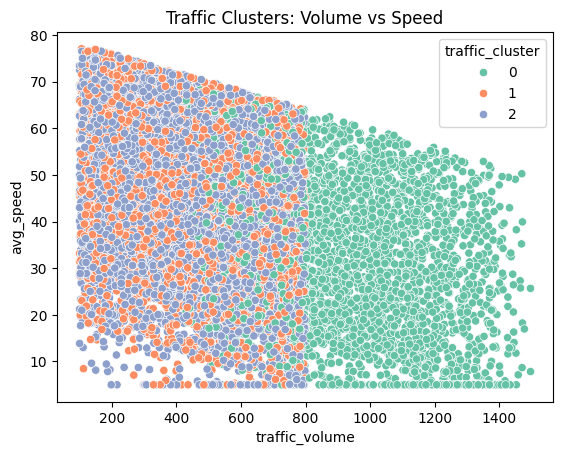

In [10]:
sns.scatterplot(
    x="traffic_volume",
    y="avg_speed",
    hue="traffic_cluster",
    data=df,
    palette="Set2"
)
plt.title("Traffic Clusters: Volume vs Speed")
plt.show()

# Save Clustered Dataset

In [11]:
df.to_csv("../data/urban_traffic_clustered.csv", index=False)